# สร้างโมเดล Linear Regression สำหรับการคาดเดาหวยงวดถัดไป

### ติดตั้ง Package ที่ยังไม่มีใน Notebook Jupytor

In [186]:
!pip install matplotlib 
!pip install scikit-learn

## 0.นำเข้า Package ที่เกี่ยวข้อง

In [1]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

2025-04-10 19:12:43.674812: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-10 19:12:43.675248: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-10 19:12:43.677480: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-10 19:12:43.684777: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1744287163.696686  284153 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1744287163.69

## 1.ให้ทำการโหลดข้อมูลจากลิงค์
[โหลดข้อมูลจากลิงค์นี้](https://drive.google.com/file/d/1qpXVeS2oEf-DW_jFTusoNwkUJIM2x3ME/view)


## 2.นำเข้าข้อมูลจากไฟล์


In [3]:
dataset = pd.read_csv("lottery.csv")

ตรวจสอบ Header และ 5 บันทัดแรกของ Data

In [4]:
dataset.head()

,Last_Three_Digits,Date,Month,Years,First_Price,Last_Two_Digits_Upper,Three_Digits_Upper,Last_Two_Digits_Under,Datetime,day_of_week,weekday_name
0,559 626 098 654,16,11,2567,187221,21,221,38,2024-11-16,5,เสาร์
1,036 923 547 980,1,11,2567,536044,44,44,32,2024-11-01,4,ศุกร์
2,174 225 063 231,16,10,2567,482962,62,962,0,2024-10-16,2,พุธ
3,561 648 493 919,1,10,2567,718665,65,665,59,2024-10-01,1,อังคาร
4,053 812 079 566,16,9,2567,608662,62,662,37,2024-09-16,0,จันทร์


## 3.Data Preprocessing - การเตรียมข้อมูล - One - Hot - Encoding

เลือกเฉพาะ Feature ที่เราคิดว่าสำคัญ ซึ่งจะเลือกเป็น
1. Date
2. Months
3. Years
4. Weekday_name

ส่วน Output ที่เราต้องการจะให้เป็น **First_price** หรือก็คือ **รางวัลที่ 1**


### Droping Column ทิ้งหลักที่ไม่สนใจ เพื่อเก็บ Feature

In [5]:
feature_dataset = dataset[["Date", "Month", "Years" ,"weekday_name"]]

In [6]:
feature_dataset.head()

,Date,Month,Years,weekday_name
0,16,11,2567,เสาร์
1,1,11,2567,ศุกร์
2,16,10,2567,พุธ
3,1,10,2567,อังคาร
4,16,9,2567,จันทร์


In [7]:
# Cleaning Data
feature_dataset = feature_dataset.dropna() # ลบค่า NaN
feature_dataset = feature_dataset.drop_duplicates() # ลบค่าที่ซ้ำกัน

In [12]:
feature_dataset

,Date,Month,Years,weekday_name
0,16,11,2567,เสาร์
1,1,11,2567,ศุกร์
2,16,10,2567,พุธ
3,1,10,2567,อังคาร
4,16,9,2567,จันทร์
...,...,...,...,...
810,30,12,2533,อาทิตย์
811,16,12,2533,อาทิตย์
812,1,12,2533,เสาร์
813,16,11,2533,ศุกร์


### One-Hot Encoding

In [13]:
encoded_dataset = pd.get_dummies(feature_dataset, columns=["weekday_name"], drop_first=False)

In [15]:
encoded_dataset.columns

Index(['Date', 'Month', 'Years', 'weekday_name_จันทร์',
       'weekday_name_พฤหัสบดี', 'weekday_name_พุธ', 'weekday_name_ศุกร์',
       'weekday_name_อังคาร', 'weekday_name_อาทิตย์', 'weekday_name_เสาร์'],
      dtype='object')

In [16]:
encoded_dataset.head()

,Date,Month,Years,weekday_name_จันทร์,weekday_name_พฤหัสบดี,weekday_name_พุธ,weekday_name_ศุกร์,weekday_name_อังคาร,weekday_name_อาทิตย์,weekday_name_เสาร์
0,16,11,2567,False,False,False,False,False,False,True
1,1,11,2567,False,False,False,True,False,False,False
2,16,10,2567,False,False,True,False,False,False,False
3,1,10,2567,False,False,False,False,True,False,False
4,16,9,2567,True,False,False,False,False,False,False


### Get Output - เลือก Output ที่อยากทำนาย

In [17]:
expect_output = dataset[["First_Price"]]

In [18]:
expect_output = expect_output.dropna() # ลบค่า NaN
expect_output = expect_output.drop_duplicates() # ลบค่าที่ซ้ำกัน

## 4.แยกข้อมูลเป็น Train/Test

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(encoded_dataset, expect_output, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)

(652, 10)
(163, 10)


## 5.Data Transformations - แปลงค่า Row ให้เป็น Array Float32

In [20]:
train_feature_dataset_array = X_train.to_numpy().astype("float32")
train_expect_output_array = y_train.to_numpy().astype("float32")

test_feature_dataset_array = X_test.to_numpy().astype("float32")
test_expect_output_array = y_test.to_numpy().astype("float32")


## 6.Data Improvements (Optional - ไม่บังคับ แต่ควรทำ)

In [197]:
!pip install scikit-learn

### Create Normalizer

In [21]:
# Normalization
from sklearn.preprocessing import MinMaxScaler
feature_scaler = MinMaxScaler((0, 1))
output_scaler = MinMaxScaler((0, 1))

### Normalize Data

In [22]:
scaled_feature_array = feature_scaler.fit_transform(train_feature_dataset_array)
scaled_output_array = output_scaler.fit_transform(train_expect_output_array)

In [200]:
scaled_feature_array

array([[0.        , 0.8181819 , 0.1764679 ],
       [0.51724136, 0.09090909, 0.47058868],
       [0.51724136, 0.8181819 , 0.58823395],
       ...,
       [0.        , 0.5454545 , 0.6764679 ],
       [0.51724136, 0.6363636 , 0.47058868],
       [0.51724136, 0.6363636 , 0.88235474]], dtype=float32)

## 7.Create Model

### Set Random


In [23]:
tf.random.set_seed(42)

### Check Shape

In [24]:
scaled_feature_array.shape[1],

(10,)

### Create Nueral Network Blueprints - ร่างโครงสร้างโมเดล

In [63]:
input_layer = tf.keras.layers.Input(shape=(scaled_feature_array.shape[1],))
hidden_layer_1 = tf.keras.layers.Dense(128, activation="relu")(input_layer)
hidden_layer_2 = tf.keras.layers.Dense(64, activation="relu")(hidden_layer_1)
hidden_layer_3 = tf.keras.layers.Dense(32, activation="relu")(hidden_layer_2)
output_layer = tf.keras.layers.Dense(1, activation="linear")(hidden_layer_3)
model = tf.keras.models.Model(inputs=input_layer, outputs=output_layer)
model.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)      │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 128)            │         1,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,777 (46.00 KB)

 Trainable params: 11,777 (46.00 KB)

 Non-trainable params: 0 (0.00 B)

### Build Model - ประกอบโมเดล

In [64]:
model.compile(optimizer="adam", loss="mse", metrics=["mae"])



#### สรุปโครงสรา้งโมเดล

In [65]:
model.summary()


Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)      │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 128)            │         1,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,777 (46.00 KB)

 Trainable params: 11,777 (46.00 KB)

 Non-trainable params: 0 (0.00 B)

## 8.Training


In [66]:
history = model.fit(scaled_feature_array, scaled_output_array, epochs=500, batch_size=32, validation_split=0.2)


Epoch 1/500
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0606 - mae: 0.1674 - val_loss: 0.0346 - val_mae: 0.1000
Epoch 2/500
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0395 - mae: 0.1100 - val_loss: 0.0258 - val_mae: 0.0934
Epoch 3/500
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0321 - mae: 0.1100 - val_loss: 0.0259 - val_mae: 0.0992
Epoch 4/500
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0284 - mae: 0.1069 - val_loss: 0.0247 - val_mae: 0.0931
Epoch 5/500
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0256 - mae: 0.1019 - val_loss: 0.0236 - val_mae: 0.0878
Epoch 6/500
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0231 - mae: 0.0954 - val_loss: 0.0228 - val_mae: 0.0830
Epoch 7/500
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0213 - mae: 0.0899 - val_loss: 0.0224 - val_mae: 0.0800
Epoch 8/500
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0196 - mae: 0.0849 - val_loss: 0.0221 - val_mae: 0.0778
Epoch 9/500
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.018

## 9.Plotting Traing Result


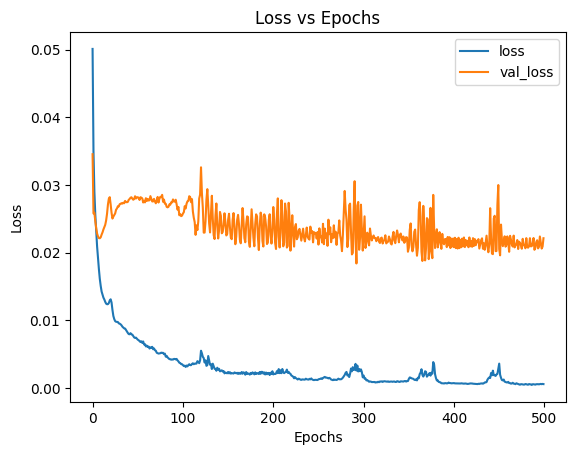

In [67]:
plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.title("Loss vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

## 10.Evaluate Test Set - ทดสอบผลด้วยข้อมูลที่เราตัดออกไป

In [68]:
# Step 1: Scale the test features before prediction // แปลงข้อมูลทดสอบให้เป็นมาตรฐานเดียวกันกับข้อมูลที่ใช้ในการฝึก
scaled_test_features = feature_scaler.transform(test_feature_dataset_array)

# Step 2: Make predictions on the scaled test data // ทำนายผลจากข้อมูลทดสอบที่ได้แปลงแล้ว
scaled_predictions = model.predict(scaled_test_features)

# Step 3: Inverse transform to get the actual numbers // แปลงค่าที่ทำนายกลับไปยังมาตรฐานเดิม
result = output_scaler.inverse_transform(scaled_predictions).astype("int")


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


In [69]:
print(result.shape)
print(test_expect_output_array.shape)

(163, 1)
(163, 1)


## 11.Insert Result To Dataframe

In [70]:
result_data_dict = {
    "result": result.flatten(),
    "expect_output": test_expect_output_array.flatten()
}
result_data = pd.DataFrame(result_data_dict)
result_data.head()

,result,expect_output
0,731577,272932.0
1,275359,583470.0
2,568900,850348.0
3,512060,506260.0
4,-239654,750792.0


## 12.Plotting the results


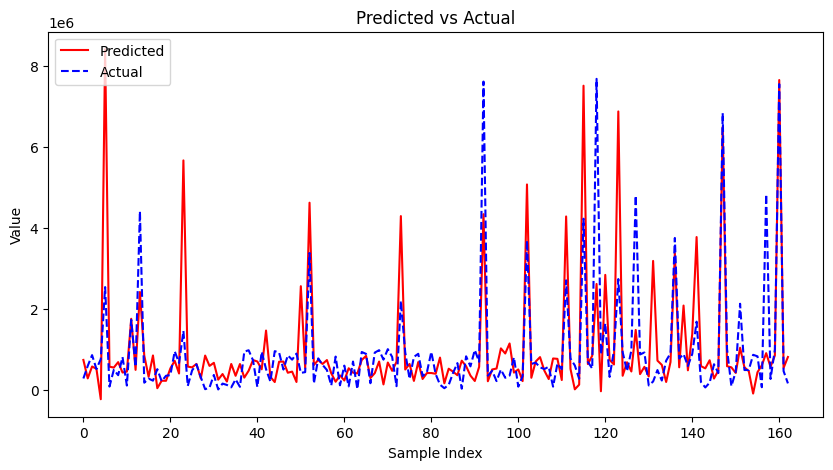

In [71]:
# Plotting the results
plt.figure(figsize=(10, 5))
plt.plot(result_data["result"], label="Predicted", color="red", linestyle="-")
plt.plot(result_data["expect_output"], label="Actual", color="blue" , linestyle="--")
plt.title("Predicted vs Actual")
plt.xlabel("Sample Index")
plt.ylabel("Value")
plt.legend()
plt.show()


## 13.Save Model

In [34]:
model.save("lottery_model_encoded.h5")
model.save("lottery_model_encoded.keras")

# Training With learning rate Scheduler callback

## Create Model

In [58]:
input_layer = tf.keras.layers.Input(shape=(scaled_feature_array.shape[1],))
hidden_layer_1 = tf.keras.layers.Dense(128, activation="relu")(input_layer)
hidden_layer_2 = tf.keras.layers.Dense(16, activation="relu")(hidden_layer_1)
output_layer = tf.keras.layers.Dense(1, activation="linear")(hidden_layer_2)
model = tf.keras.models.Model(inputs=input_layer, outputs=output_layer)


In [59]:
model.compile(optimizer="adam", loss="mse", metrics=["mae"])
model.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │         1,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 16)             │         2,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,489 (13.63 KB)

 Trainable params: 3,489 (13.63 KB)

 Non-trainable params: 0 (0.00 B)

In [60]:
def scheduler(epoch, lr):
    if epoch >= 400:
        return 0.01
    return 0.1

In [61]:
my_callback = tf.keras.callbacks.LearningRateScheduler(scheduler, verbose=1)

In [62]:

history = model.fit(scaled_feature_array, scaled_output_array, epochs=500, batch_size=32, validation_split=0.2, callbacks=[my_callback])



Epoch 1: LearningRateScheduler setting learning rate to 0.1.
Epoch 1/500
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 4.8470 - mae: 1.0392 - val_loss: 0.1314 - val_mae: 0.3137 - learning_rate: 0.1000

Epoch 2: LearningRateScheduler setting learning rate to 0.1.
Epoch 2/500
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1217 - mae: 0.2673 - val_loss: 0.0335 - val_mae: 0.0861 - learning_rate: 0.1000

Epoch 3: LearningRateScheduler setting learning rate to 0.1.
Epoch 3/500
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0467 - mae: 0.1320 - val_loss: 0.0387 - val_mae: 0.1582 - learning_rate: 0.1000

Epoch 4: LearningRateScheduler setting learning rate to 0.1.
Epoch 4/500
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0476 - mae: 0.1618 - val_loss: 0.0332 - val_mae: 0.1093 - learning_rate: 0.1000

Epoch 5: LearningRateScheduler setting learning rate to 0.1.
Epoch 5/500
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0459 - mae: 0.1222 - val_loss: 0.0330 - val_mae: 0.1028 - learnin

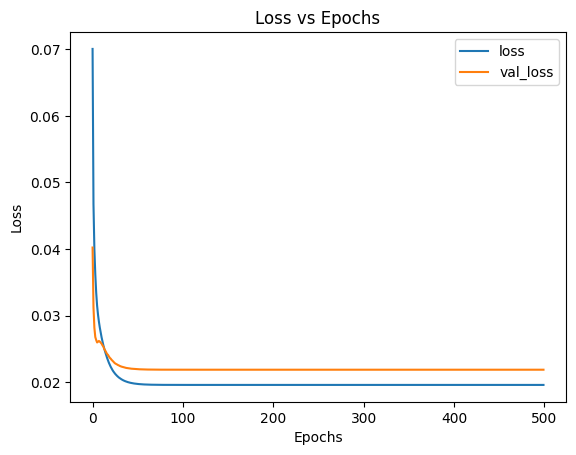

In [48]:
plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.title("Loss vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [49]:
# Step 1: Scale the test features before prediction // แปลงข้อมูลทดสอบให้เป็นมาตรฐานเดียวกันกับข้อมูลที่ใช้ในการฝึก
scaled_test_features = feature_scaler.transform(test_feature_dataset_array)
# Step 2: Make predictions on the scaled test data // ทำนายผลจากข้อมูลทดสอบที่ได้แปลงแล้ว
scaled_predictions = model.predict(scaled_test_features)
# Step 3: Inverse transform to get the actual numbers // แปลงค่าที่ทำนายกลับไปยังมาตรฐานเดิม
result = output_scaler.inverse_transform(scaled_predictions).astype("int")


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


In [50]:
print(result.shape)
print(test_expect_output_array.shape)

(163, 1)
(163, 1)


In [51]:

result_data_dict = {
    "result": result.flatten(),
    "expect_output": test_expect_output_array.flatten()
}
result_data = pd.DataFrame(result_data_dict)
result_data.head()


,result,expect_output
0,352937,272932.0
1,420159,583470.0
2,655111,850348.0
3,383674,506260.0
4,2289006,750792.0


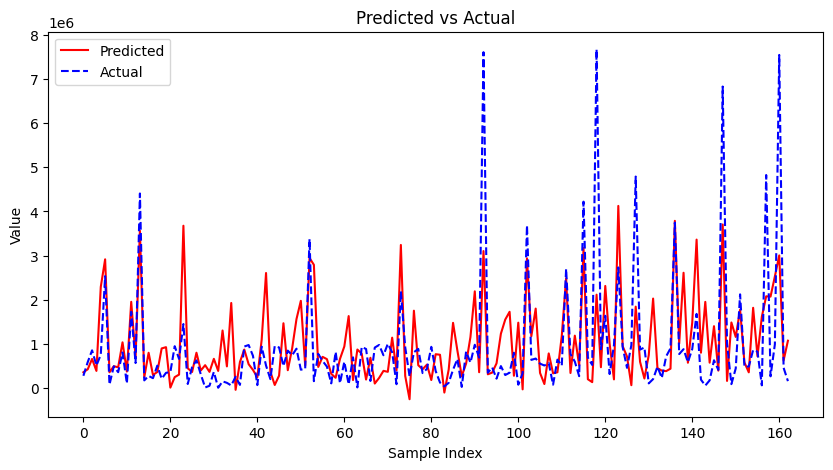

In [52]:
# Plotting the results
plt.figure(figsize=(10, 5))
plt.plot(result_data["result"], label="Predicted", color="red", linestyle="-")
plt.plot(result_data["expect_output"], label="Actual", color="blue" , linestyle="--")
plt.title("Predicted vs Actual")
plt.xlabel("Sample Index")
plt.ylabel("Value")
plt.legend()
plt.show()